In [1]:
#-*- coding: utf-8 -*-

<img align="right" style="max-width: 200px; height: auto" src="images/cfds_logo.png">

###  Lab 03 - "Supervised Machine Learning"

Chartered Financial Data Scientist (CFDS), Spring Term 2019

### Lab Content:

In the last lab you learned about Python programming fundamentals such as conditions, loops as well was how to implement functions etc. In this third lab we will build our first supervised machine learning "pipeline" using:

- (1) the **Gaussian Naive-Bayes (Gaussian NB)** classifier, and; 
- (2) the **k Nearest-Neighbours (kNN)** classifier 

you learned about in the lecture.

The Gaussian **Naive-Bayes (NB)** classifier belongs to the family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes has been studied extensively since the 1950s and remains a popular (baseline) method for text categorization as well as other domains.

The **k Nearest-Neighbours (kNN)** is a simple, easy to understand, versatile but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches) it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. 

The content of this fourth lab is inspired by the DataCamp k-NN tutorial developed by Avinash Navlani. The original tutorial can found under the following url: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn. 

In case you experiencing any difficulties with the lab content or have any questions pls. don't hesitate to Marco Schreyer (marco.schreyer@unisg.ch).

### Lab Objectives:

After today's lab you should be able to:

> 1. Understand how a Gaussian **Naive-Bayes (NB)** classifer can be trained and evaluated.
> 2. Understand how a **k Nearest-Neighbor (kNN)** classifier can be trained and evaluated.
> 3. Know how to Python's **sklearn library** to train and evaluate arbitrary classifiers.
> 4. Understand how to evaluate interpret the **classification results**. 

### Step 0: Setup of Analysis Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. For the purpose of this lab will use the pandas, numpy, sklearn, matplotlib and seaborn library. Let's import the libraries by execution of the statements below:

In [2]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline Jupyter notebook plotting:

In [3]:
%matplotlib inline

## A. Gaussian "Naive-Bayes" (NB) Classification

### Step 1.0: Dataset Download and Data Assessment

The iris dataset is a classic and very easy multi-class classification dataset. This data sets consists of 3 different types of irises’ (classes),  namely Setosa, Versicolour, and Virginica) as well as their respective petal and sepal length (features).

<img align="center" style="max-width: 700px; height: auto" src="images/iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements (features):

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details on the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [4]:
iris = datasets.load_iris()

Print and inspect feature names of the dataset:

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Print and inspect the class names of the dataset:

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature data is collected and recorded in the data:

<img align="center" style="max-width: 900px; height: auto" src="images/feature_collection.png">

Print and inspect the top 5 feature rows of the dataset:

In [7]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Print and inspect the top 5 labels of the dataset:

In [8]:
pd.DataFrame(iris.target, columns=["class"]).head(5)

,class
0,0
1,0
2,0
3,0
4,0


Determine and print the feature dimensionality of the dataset:

In [9]:
iris.data.shape

(150, 4)

Determine and print the label dimensionality of the dataset:

In [10]:
iris.target.shape

(150,)

Plot the data distributions of the distinct features and its class membership respectively:

<Figure size 720x720 with 0 Axes>

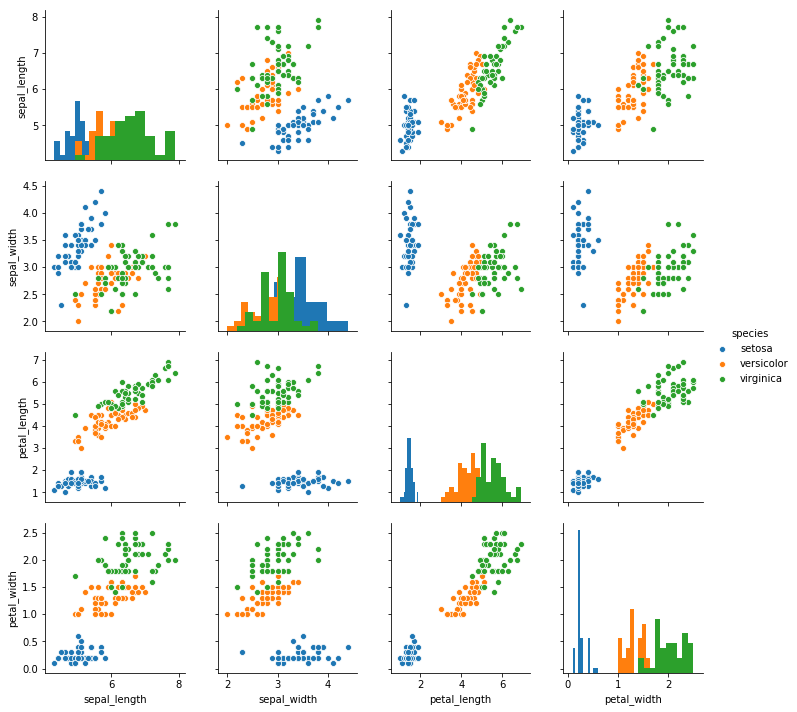

In [11]:
plt.figure(figsize=(10, 10))
iris_plot = sns.load_dataset("iris")
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

### Step 1.1. Dataset Pre-Processing

In order to understand and evaluate the performance of any trained model, it is good practice to divide the dataset into a **training set** (the fraction of records soley used for training purposes) and a **evaluation set** (the fraction of records soley used for evaluation purposes). Pls. note, the **evaluation set** will never shown to the model as part of the training process.

We set the fraction of testing records to **30%** of the original dataset:

<img align="center" style="max-width: 500px; height: auto" src="images/train_eval_dataset.png">

In [12]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearns `train_test_split` function:

In [13]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction)

Evaluate the training set dimensionality:

In [14]:
x_train.shape, y_train.shape

((105, 4), (105,))

Evaluate the evaluation set dimensionality:

In [15]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

### Step 1.2. Gaussian Naive-Bayes (NB) Classification

In probability theory and statistics, the **Bayes' theorem** (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. 

As you learned in the lecture the Bayes' theorem provides a way of calculating posterior probability $P(c|x)$. Let's briefly revisit the Bayes equation below:

<img align="center" style="max-width: 400px; height: auto" src="images/bayes_theorem.png">

Above,

>- $P(c|x)$ is the **posterior** probability of class (c, target) given a predictor (x, attributes).
>- $P(c)$ is the **prior** probability of a class.
>- $P(x|c)$ is the **likelihood** which is the probability of a predictors given class.
>- $P(x)$ is the **evidence** of a feature also sometimes referred to as predictor.

#### Step 1.2.1. Calculation of the prior probabilities $P(c)$ of each class

Let's get an intuition of the Bayes' theorem by calculating the prior probability $P(c)$ of each class. Therefore, we first obtain the number of occurance of each class in the training data:

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)  

{0: 37, 1: 33, 2: 35}


Let's convert the obtained counts into probabilites by dividing the class counts by the overall number of observations:

In [17]:
prior_probabilities = counts / x_train.shape[0]
print(prior_probabilities)

[0.35238095 0.31428571 0.33333333]


#### Step 1.2.2. Calculation of the evidence $P(x)$ of each feature

Let's now calculate the evidence $P(x)$ of each feature. During the lecture we learned that we can approximate $P(x)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$ applying the "law of large numbers" or "Central Limit Theorem" (you may want to have a look at further details of the theorem under: https://en.wikipedia.org/wiki/Central_limit_theorem). 

The **evidence** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$ and standard deviation $\sigma$:

<img align="center" style="max-width: 600px; height: auto" src="images/evidence_calculation.png">

We will approximate the probability density $P(x) \approx \mathcal{N}(x | \mu, \sigma)$ of each of each feature by a Gaussian. But how can this be achieved? 

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the iris dataset. The following line of code determines a histogram of the true feature value distribution:

In [18]:
# determine a histogram of the feature value distribution
hist, bin_edges = np.histogram(x_train[:, 0], bins=10, density=True)
print(hist)
print(bin_edges)

[0.19607843 0.33613445 0.44817927 0.42016807 0.28011204 0.47619048
 0.33613445 0.33613445 0.05602241 0.05602241]
[4.3  4.64 4.98 5.32 5.66 6.   6.34 6.68 7.02 7.36 7.7 ]


Let's also plot the probability density accordingly:

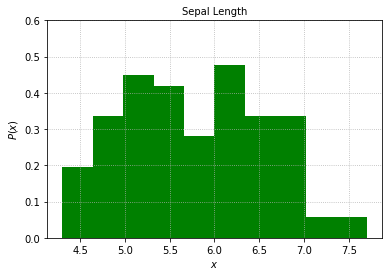

In [19]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, density=True, color='g')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 0.6])

# add plot title
ax.set_title('Sepal Length', fontsize=10);

How can we approximate the true probability density of the **sepal length** feature? Well we need calculate it's mean $\mu$ and standard deviation $\sigma$. Let's start by calculating the mean $\mu$ of the **sepal length** feature:

In [20]:
mean = np.mean(x_train[:, 0])
print(mean)

5.757142857142857


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature:

In [21]:
std = np.std(x_train[:, 0])
print(std)

0.7780142173822916


We can now determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma)$ of the **sepal length** feature using the $\mu$ and $\sigma$ obtained above as well as the `pdf.norm` function of the `scipy.stats` package:

In [22]:
hist_gauss = norm.pdf(bin_edges, mean, std)
print(hist_gauss)

[0.08876123 0.18289956 0.311359   0.43789461 0.5087884  0.48838714
 0.38730282 0.25374443 0.1373415  0.06141387 0.02268771]


Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x) \approx \mathcal{N}(\mu, \sigma)$:

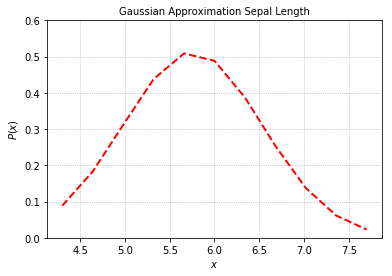

In [23]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(bin_edges, norm.pdf(bin_edges, mean, std), color='r', linestyle='--', linewidth=2)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 0.6])

# add plot title
ax.set_title('Gaussian Approximation Sepal Length', fontsize=10);

#### Step 1.2.3. Calculation of the likelihood $P(x|c)$ of each feature

Let's now see how we can calculate the **likelihood** $P(x|c)$ which is the probability density of a feature given a certain class $c$. We will again can estimate $P(x|c)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$ applying the "law of large numbers".

The **likelihood** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$, standard deviation $\sigma$ and it's corresponding class condition $c$:

<img align="center" style="max-width: 600px; height: auto" src="images/likelihood_calculation.png">

Let's start by applying the class conditioning. This is usually done by filtering the dataset for each class $c$:

In [24]:
x_train_setosa = x_train[y_train == 0]
x_train_versicolor = x_train[y_train == 1]
x_train_virginica = x_train[y_train == 2]

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the iris dataset given the class **setosa**. The following line of code determines a histogram of the true feature value distribution:

In [25]:
# determine a histogram of the feature value distribution
hist_setosa, bin_edges_setosa = np.histogram(x_train_setosa[:, 0], bins=10, range=(np.min(x_train[:, 0]), np.max(x_train[:, 0])), density=True)
print(hist_setosa)
print(bin_edges_setosa)

[0.55643879 0.87440382 0.95389507 0.39745628 0.15898251 0.
 0.         0.         0.         0.        ]
[4.3  4.64 4.98 5.32 5.66 6.   6.34 6.68 7.02 7.36 7.7 ]


Let's also plot the probability density accordingly:

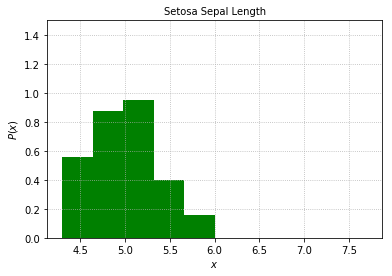

In [26]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train_setosa[:, 0], bins=10, range=(np.min(x_train[:, 0]), np.max(x_train[:, 0])), density=True, color='g')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Setosa Sepal Length', fontsize=10);

We are again able to determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given the class **setosa** using the $\mu$ and $\sigma$ obtained above as well as the `pdf.norm` function of the `scipy.stats` package.

Let's continue by calculating the mean $\mu$ of the **sepal length** feature given the class **setosa**:

In [27]:
mean_setosa = np.mean(x_train_setosa[:, 0])
print(mean_setosa)

4.981081081081081


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature given the class **setosa**:

In [28]:
std_setosa = np.std(x_train_setosa[:, 0])
print(std_setosa)

0.3577994590344118


In [29]:
hist_gauss = norm.pdf(bin_edges_setosa, mean_setosa, std_setosa)
print(hist_gauss)

[1.82161025e-01 7.07850760e-01 1.11498341e+00 7.11927163e-01
 1.84265140e-01 1.93326442e-02 8.22204392e-04 1.41745339e-05
 9.90554186e-08 2.80600311e-10 3.22209630e-13]


Let's now plot the approximate Gaussian (Normal) probability density distribution $P(x | c) \approx \mathcal{N}(\mu, \sigma, c)$:

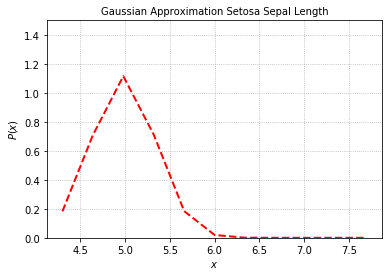

In [30]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(bin_edges, norm.pdf(bin_edges_setosa, mean_setosa, std_setosa), color='r', linestyle='--', linewidth=2)

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$P(x)$", fontsize=10)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Gaussian Approximation Setosa Sepal Length', fontsize=10);

Now we have determined all the necessary distributions $P(c)$, $P(x)$ and $P(x|c)$ given the class **setosa** and the **sepal length** feature in order to determine if a new (so far unknown) sepal length observation belongs to an Iris Setosa. Let's calculate the probability of a sepal length observation of 6.4 and its probability of beeing of class **setosa**: 

In [31]:
sepal_length = 6.4
probability = (0.3333 * norm.pdf(sepal_length, mean_setosa, std_setosa)) / norm.pdf(sepal_length, mean, std)
print(probability)

0.0003921411663833036


Ok, it seems to be very unlikely that this Iris flower is of class **setosa**. Let's compare this to a sepal length observation of 5.1 and determine its probability of beeing of class **setosa**:

In [32]:
sepal_length = 5.4
probability = (0.3333 * norm.pdf(sepal_length, mean_setosa, std_setosa)) / norm.pdf(sepal_length, mean, std)
print(probability)

0.4057615338684728


Alright, this observations seems to be significantly more probable of class **setosa**.

The Naive-Bayes algorithm assumes that your features are independent (hence we call it "naive", since it makes the naive assumption about independence, so we don't have to care about dependencies between them). We can use the independence assumption to enhance the single feature model outlined above to multiple features by defining a dot product as defined below: 

<img align="center" style="max-width: 800px; height: auto" src="images/multiple_features.png">

#### Step 1.2.4. Training and utilization of a Gaussian Naive-Bayes Classifier using Python's Sklearn library

Luckily, there is Python library named `sklearn` that provides a variety of supervised classification algorithms which we will use in the following. 

Let's init the **Gaussian Naive-Bayes (GaussianNB)** classifier of `sklearn`: 

In [33]:
gnb = GaussianNB()

Train or fit the GaussianNB classifier using the training dataset features and labels:

In [34]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Utilize the trained model to predict the response for the evaluation dataset:

In [35]:
y_pred = gnb.predict(x_eval)

Let's have a look at the predicted class labels:

In [36]:
y_pred

array([2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       2])

As well as the true class labels:

In [37]:
y_eval

array([2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       2])

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [38]:
print("Accuracy: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy:  0.9777777777777777


Determine number of missclassified data sampels in the evaluation dataset:

In [39]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 1


In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the Matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="center" style="max-width: 300px; height: auto" src="images/confusion_matrix.png">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Determine and plot the **confusion matrix** of the individual predictions:

In [40]:
mat = confusion_matrix(y_eval, y_pred)

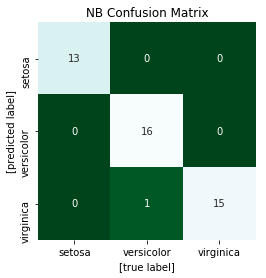

In [41]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('NB Confusion Matrix')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of distinct train- vs. eval-data ratios.**

> Change the ratio of training data vs. evaluation data to 30%/70% (currently 70%/30%), fit your model and calculate the new classification accuracy. Subsequently, repeat the experiment a second time using a 10%/90% fraction of training data/evaluation data. What can be observed in both experiments in terms of classification accuracy? 

**2. Calculate the true-positive as well as false-positive rate of the Iris versicolor vs. virginica.**

> Calculate the true-positive rate as well as false-positive rate of (1) the experiment exhibiting a 30%/70% ratio of training data vs. evaluation data and (2) the experiment exhibiting a 10%/90% ratio of training data vs. evaluation data.

## B. k Nearest-Neighbor (k-NN) Classification

### Step 2.1: Dataset Download and Data Assessment

The **"Wine"** dataset is a classic and very easy multi-class classification dataset. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists of in total **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine. Please, find below the list of the individual measurements (features):

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`

Further details on the dataset can be obtained from the following puplication: *"Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy."*

Let's load the dataset and conduct a preliminary data assessment: 

In [42]:
wine = datasets.load_wine()

Print and inspect feature names of the dataset:

In [43]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print and inspect the class names of the dataset:

In [44]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Print and inspect the top 10 feature rows of the dataset:

In [45]:
pd.DataFrame(wine.data).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Print and inspect the top 10 labels of the dataset:

In [46]:
pd.DataFrame(wine.target).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Determine and print the feature dimensionality of the dataset:

In [47]:
wine.data.shape

(178, 13)

Determine and print the label dimensionality of the dataset:

In [48]:
wine.target.shape

(178,)

Plot the data distributions of the distinct features:

<Figure size 720x720 with 0 Axes>

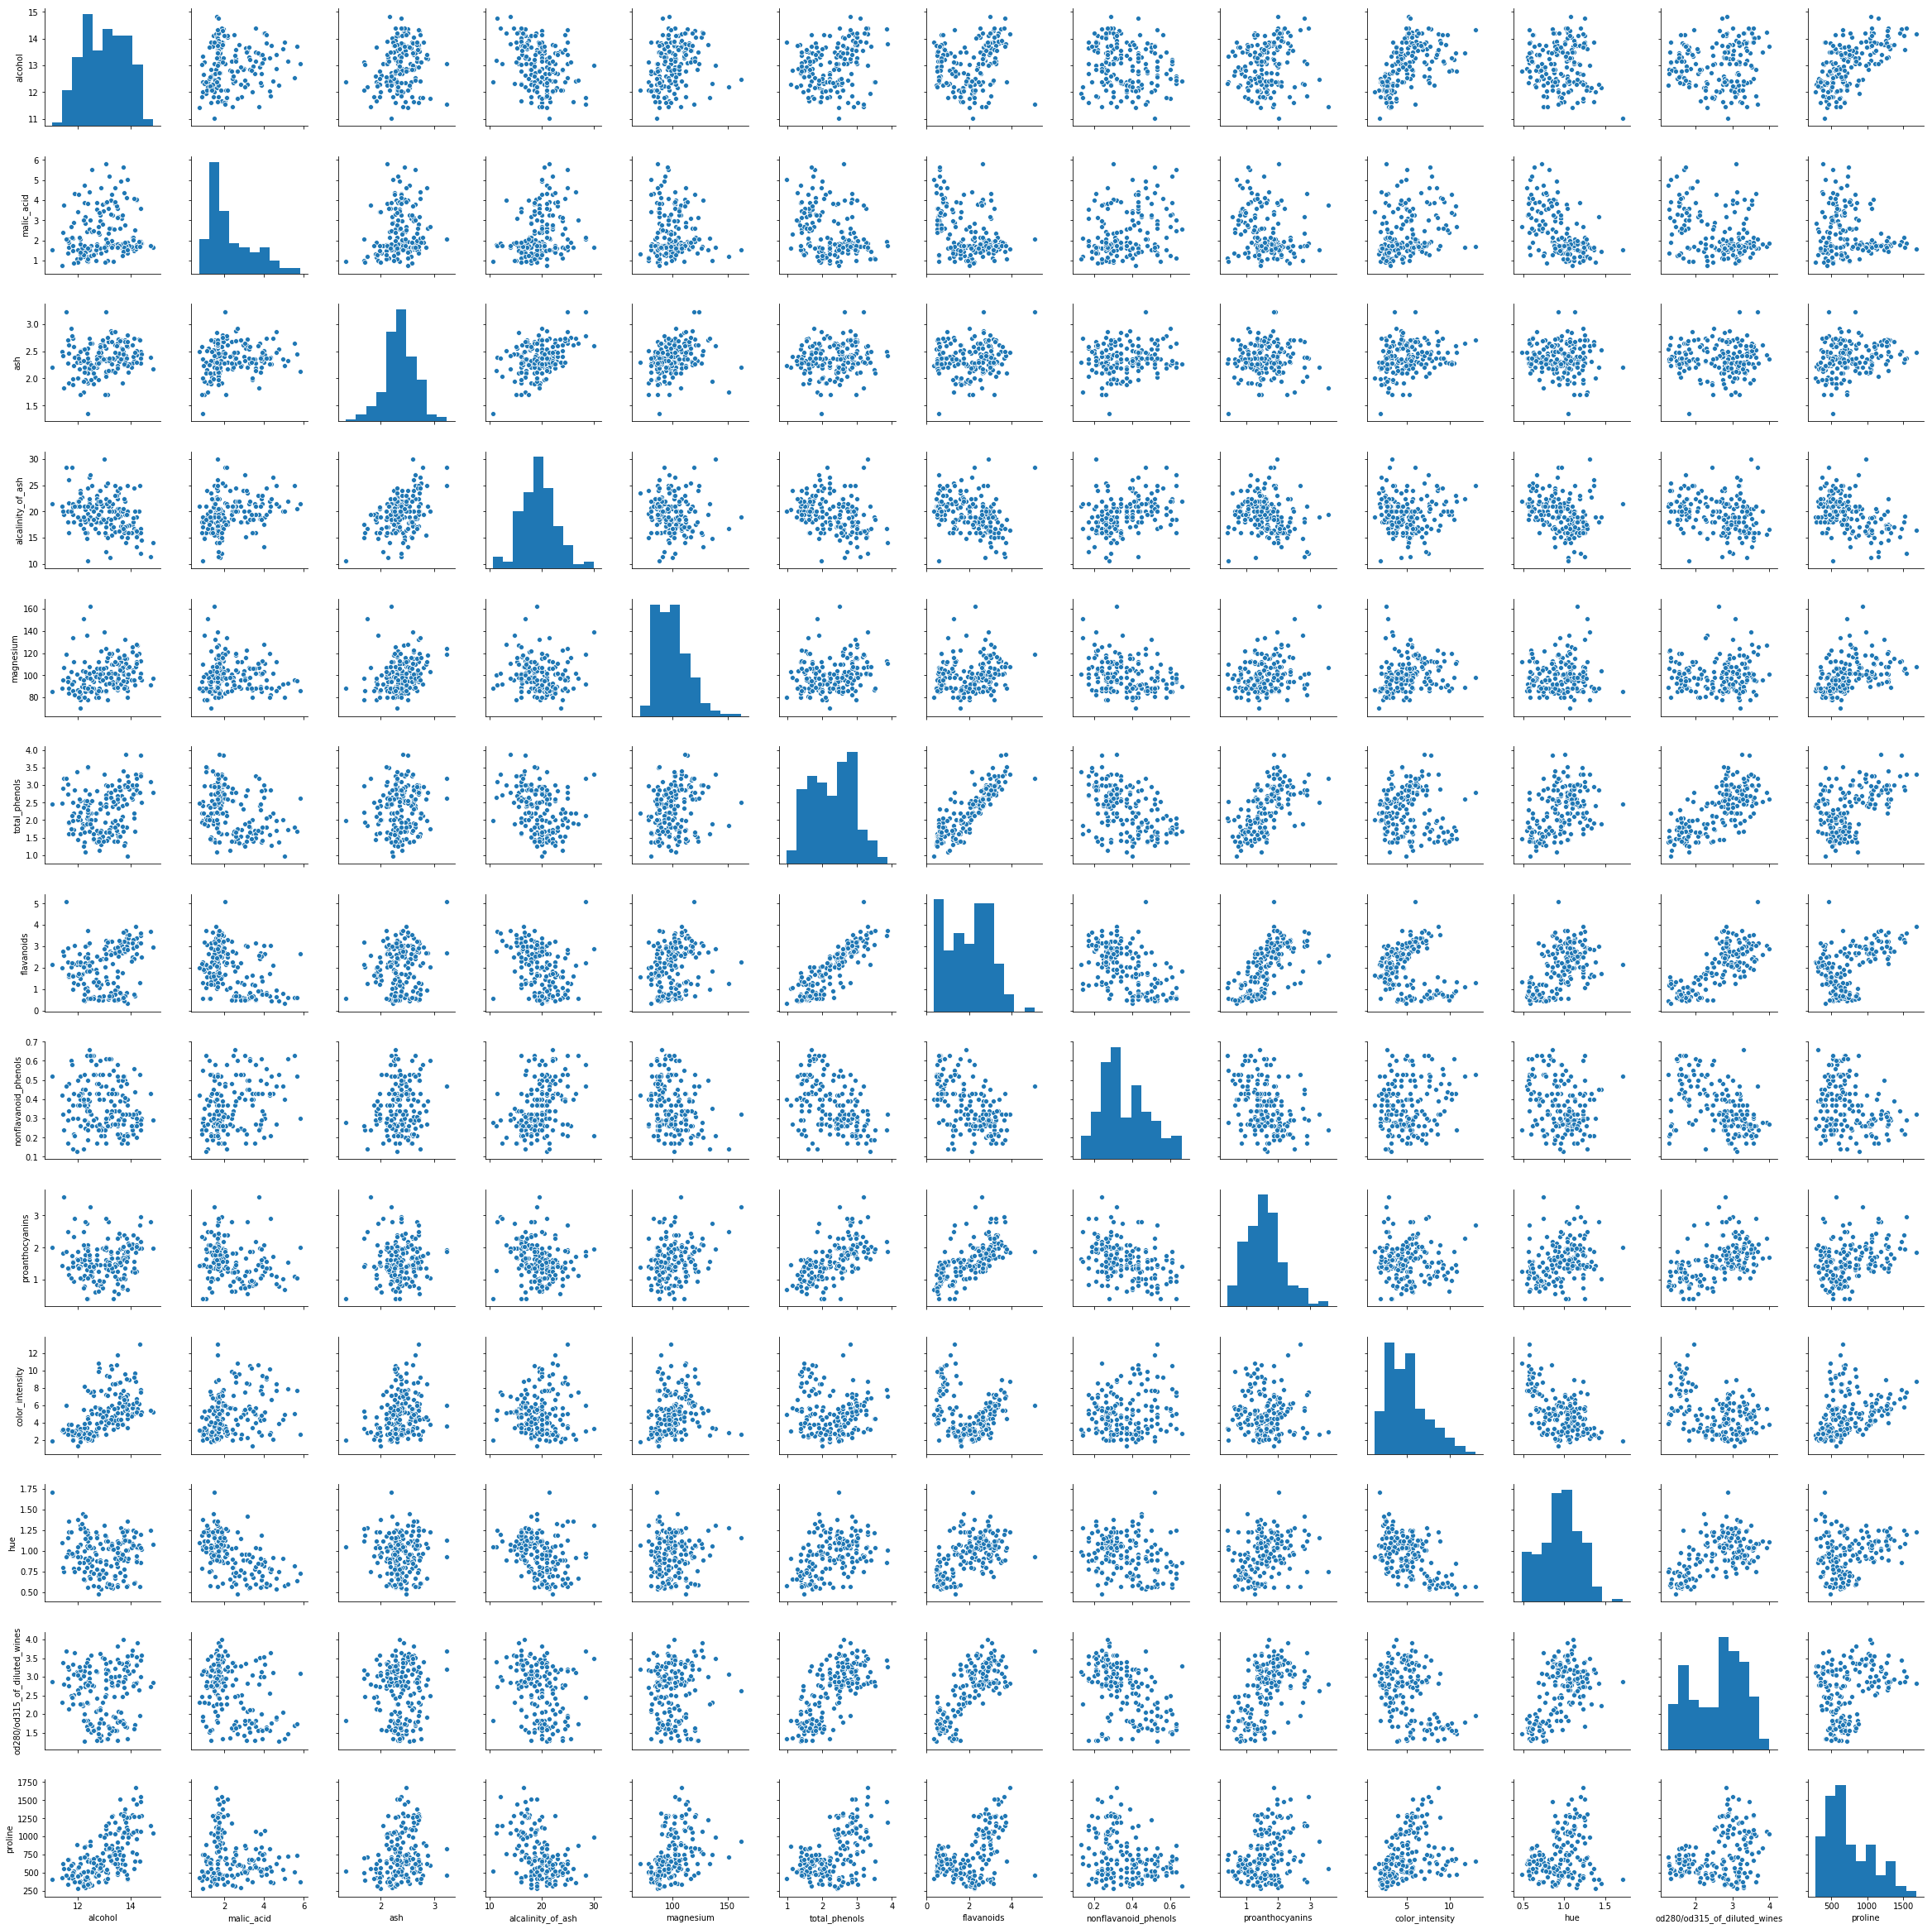

In [49]:
plt.figure(figsize=(10,10))
sns.pairplot(pd.DataFrame(wine.data, columns=wine.feature_names))

### 2.2. Dataset Pre-Processing

In order to understand and evaluate the performance of the trained k-NN model, it is good practice to divide the dataset into a **training set** (the fraction of records soley used for training purposes) and a **evaluation set** (the fraction of records soley used for evaluation purposes). Pls. note, the **evaluation set** will never shown to the model as part of the training process.

We set the fraction of testing records to 30% of the original dataset:

In [50]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearns `train_test_split` function:

In [51]:
# 70% training and 30% evaluation
X_train, X_eval, y_train, y_eval = train_test_split(wine.data, wine.target, test_size=eval_fraction)

Evaluate the training set dimensionality:

In [52]:
X_train.shape, y_train.shape

((124, 13), (124,))

Evaluate the evaluation set dimensionality:

In [53]:
X_eval.shape, y_eval.shape

((54, 13), (54,))

### 2.3. k Nearest-Neighbor Classification

Prior to running the **k Nearest-Neighbor (k-NN)** classification let's briefly revisit the distinct steps of the algorithm as discussed in the lecture:
<img align="center" style="max-width: 600px; height: auto" src="images/knn.png">

#### 3.1 Nearest Neighbors Classification, k=5

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [54]:
k_nearest_neighbors = 5

Set the metric used in calculating the distances $D(x, x_i)$ between a sample $x$ and it's neighbors $x_i$. We will use the Euclidean distance that you learned about in the lecture, given by $\sqrt{(\sum^n_{i=1}((x - x_i)^2))}$:

In [55]:
distance_metric = 'euclidean'

Init the **k-NN classifier** of Python's `sklearn` libary of data science algoritms: 

In [56]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [57]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [58]:
y_pred = knn.predict(X_eval)

Let's have a look at the predicted class labels:

In [59]:
y_pred

array([1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1,
       0, 2, 1, 1, 1, 2, 1, 1, 2, 2])

As well as the true class labels:

In [60]:
y_eval

array([1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 2, 1, 1, 1])

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [61]:
print("Accuracy, k=5: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=5:  0.5555555555555556


Determine and plot the **confusion matrix** of the individual predictions:

In [62]:
mat = confusion_matrix(y_eval, y_pred)

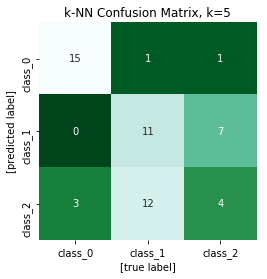

In [63]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('k-NN Confusion Matrix, k=5')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

Remember, that as part of the lecture you learned about several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [64]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.61      0.46      0.52        24
           2       0.21      0.33      0.26        12

   micro avg       0.56      0.56      0.56        54
   macro avg       0.57      0.54      0.55        54
weighted avg       0.61      0.56      0.58        54



#### 3.2 Nearest Neighbors Classification, k=8

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [65]:
k_nearest_neighbors = 8

Init the **k-NN classifier** of Python's `sklearn` libary of data science algoritms: 

In [66]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors)

Train the k-NN classifier using the training dataset:

In [67]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [68]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [69]:
print("Accuracy, k=8: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=8:  0.5925925925925926


Determine and plot the **confusion matrix** of the individual predictions:

In [70]:
mat = confusion_matrix(y_eval, y_pred)

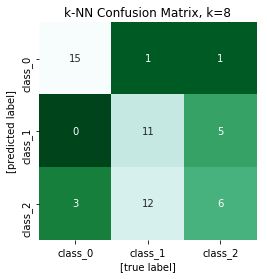

In [71]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('k-NN Confusion Matrix, k=8')
plt.xlabel('[true label]')
plt.ylabel('[predicted label]');

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. What kind of behavior in terms of prediction accuracy can be observed with increasing k?

**2. Plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Plot the prediction accuracy collected for each models above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis.

**3. Train, evaluate and plot the prediction accuracy of the k=1,...,124 Nearest Neighbor models.**

> Train, evaluate and plot the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,124. Collect and print the prediction accuracy of each model respectively and compare the results. What kind of behavior in terms of prediction accuracy can be observed with increasing k?

### Lab Summary:

In this third lab, a step by step introduction into (1) **Gaussian Naive-Bayes** and (2) **k Nearest-Neighbor** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the jupyter notebook environment e.g. on compute node or server. The cell below converts the lab notebook into a standalone and executable python script.

In [72]:
!jupyter nbconvert --to script cfds_lab_03.ipynb

[NbConvertApp] Converting notebook cfds_lab_03.ipynb to script
[NbConvertApp] Writing 27825 bytes to cfds_lab_03.py


**Note:** In order to execute the statement above and convert your lab notebook to a regular Python script you first need to install the nbconvert Python package e.g. using the pip package installer. 